# Basics of Maplotlib
This session is to cover some important visualisations available via `matplotlib`
* Line plot
* Scatter plot
* Histogram

In [95]:
# Import modules
import os
import pandas as pd
import numpy as np
import scipy as sp
## Matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as mps
%matplotlib inline
## Set-up jtplot 
# from jupyterthemes import jtplot
# jtplot.style(theme='chesterish')
# jtplot.style(ticks=True, grid=False, figsize=(8, 6))

## Line Plot

In [24]:
## Create a Dataframe
df = pd.DataFrame(np.random.normal(loc=0,scale=0.03,size=60))

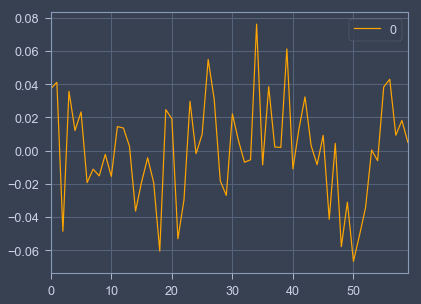

In [25]:
df.plot(color='orange');

In [33]:
df[1] = np.cumsum(df)
df.columns = ['Values','Cumsum']
df.head()

,Values,Cumsum
0,0.037205,0.037205
1,0.041185,0.078389
2,-0.048665,0.029725
3,0.035715,0.065440
4,0.012072,0.077513


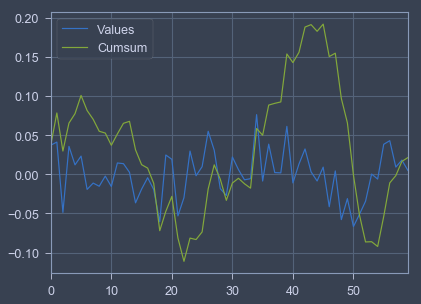

In [34]:
## Compare two series
df.plot();

## Histogram

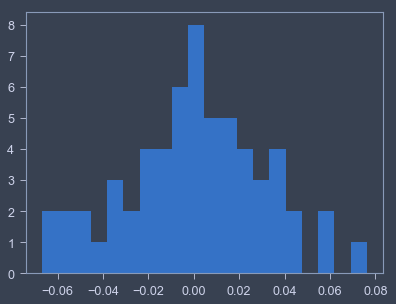

In [42]:
plt.hist(df['Values'],bins=20);

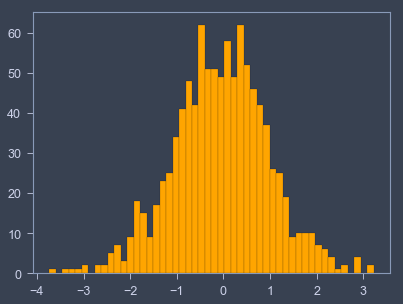

In [48]:
df = pd.Series(np.random.standard_normal(size=1000))
plt.hist(df, bins=50, color='orange',edgecolor='black');

## Scatter Plot

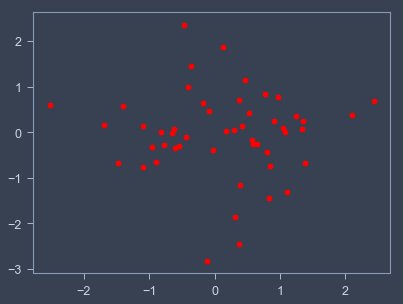

In [55]:
df_scatter = pd.DataFrame({'A':np.random.normal(size=50), 'B':np.random.normal(size=50)})
plt.scatter(df_scatter.A, df_scatter.B, color='red');

# More things about Matplotlib
How to change the plot appreance:
* Adding annotations
* Built-in styles
* Subplots
* Overlays


## Change the appearance

In [97]:
## Dataframe, that you only need to graph several columns
df = pd.DataFrame({'A': np.random.normal(size=60), 'B': np.random.normal(size=60)})
df['C'] = df['B'].cumsum()
x = np.random.normal(100, 15, size=5000)

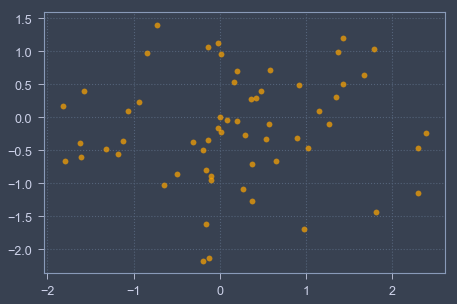

In [104]:
## Set Transparency
plt.scatter(df.A, df.B, alpha=0.7, color='orange')
plt.grid(linestyle=':');

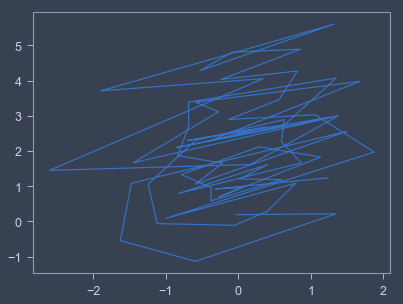

In [61]:
plt.plot(df['B'],df['C']);

''

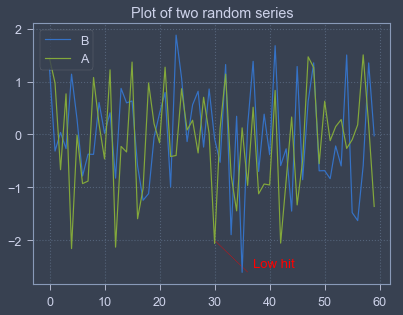

In [84]:
plt.plot(df.B)
plt.plot(df.A)
## Setting the appreance
plt.grid(linestyle=':')
plt.legend(loc=2)
plt.title('Plot of two random series')
## Annotations
plt.text(x=37,y=-2.5,s='Low hit', color='red')
plt.arrow(30,-2,6,-.6, color='red')
## style
mps.use('fast')
;

In [85]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

## Put multiple plots

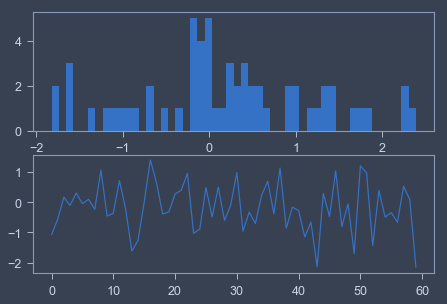

In [105]:
## typically, to put more pltos in a figure, 
## we put a fig as the entire graphic, ax as a plot within that figures
fig, (ax1, ax2) = plt.subplots(2, 1) ## 2 rows and 1 col
ax1.hist(df.A, bins=50)
ax2.plot(df.B);

## Overlay

In [118]:
x = np.random.normal(size=1000)

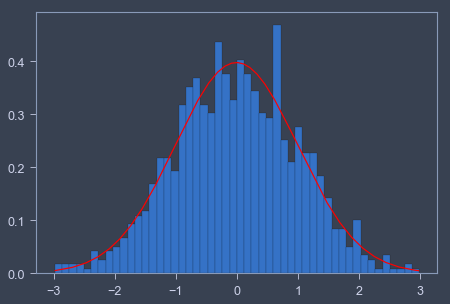

In [119]:
## Actual distribution
plt.hist(x, bins=50, edgecolor='black', density=True); ## set the density to get the standardized by z-score
## Take the empirical estimated density curve (as overlay)
from scipy.stats  import norm
mean, sd = norm.fit(x)
min_x = float(np.min(x))
max_x = float(np.max(x))
overlay = np.linspace(min_x, max_x, 1000)
params = norm.pdf(overlay, mean, sd) ## take the probability density for each values in the linspace, considering their mean and sd
plt.plot(overlay, params,'red');